<a href="https://colab.research.google.com/github/barauna-lo/Computational_Statistics/blob/main/CAP417_FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png align=”middle”>](https://www.gov.br/inpe/pt-br)

[<center><img src="https://github.com/barauna-lo/Deep-Learning/blob/main/LogoCAP.png?raw=true" width = 450 align="middle"></center>](http://www.inpe.br/posgraduacao/cap/)


# FRB Times Series Data Analyse


* Ellen Tuanne
* [Luan Orion Baraúna](https://www.linkedin.com/in/luan-orion-barauna/)
* Johan?

In this work we will present the time series analysis of the Fast Radio Burst (FRB) FRB20180725A available on the CHIME website and published in the first CHIME FRB catalog in The [Astrophysical Journal.](https://iopscience.iop.org/article/10.3847/1538-4365/ac33ab)

This series was accessed from the [tutorial]((https://chime-frb-open-data.github.io/waterfall/)) available on the collaboration website and adapted so that only the radio time series was extracted.

All time series analysis tools were used in the "Computational Statistics" course of the postgraduate program in [Applied Computing](http://www.inpe.br/posgraduacao/cap/) at the [National Institute for Space Research](https://www.gov.br/inpe/pt-br), Part C, taught by Professor Reinaldo Rosa.

The main discution behind this analyses can be found at [Multifractal characteristics of the low latitude equatorial ionospheric E–F valley region irregularities](https://www.sciencedirect.com/science/article/abs/pii/S0960077922000194?via%3Dihub).

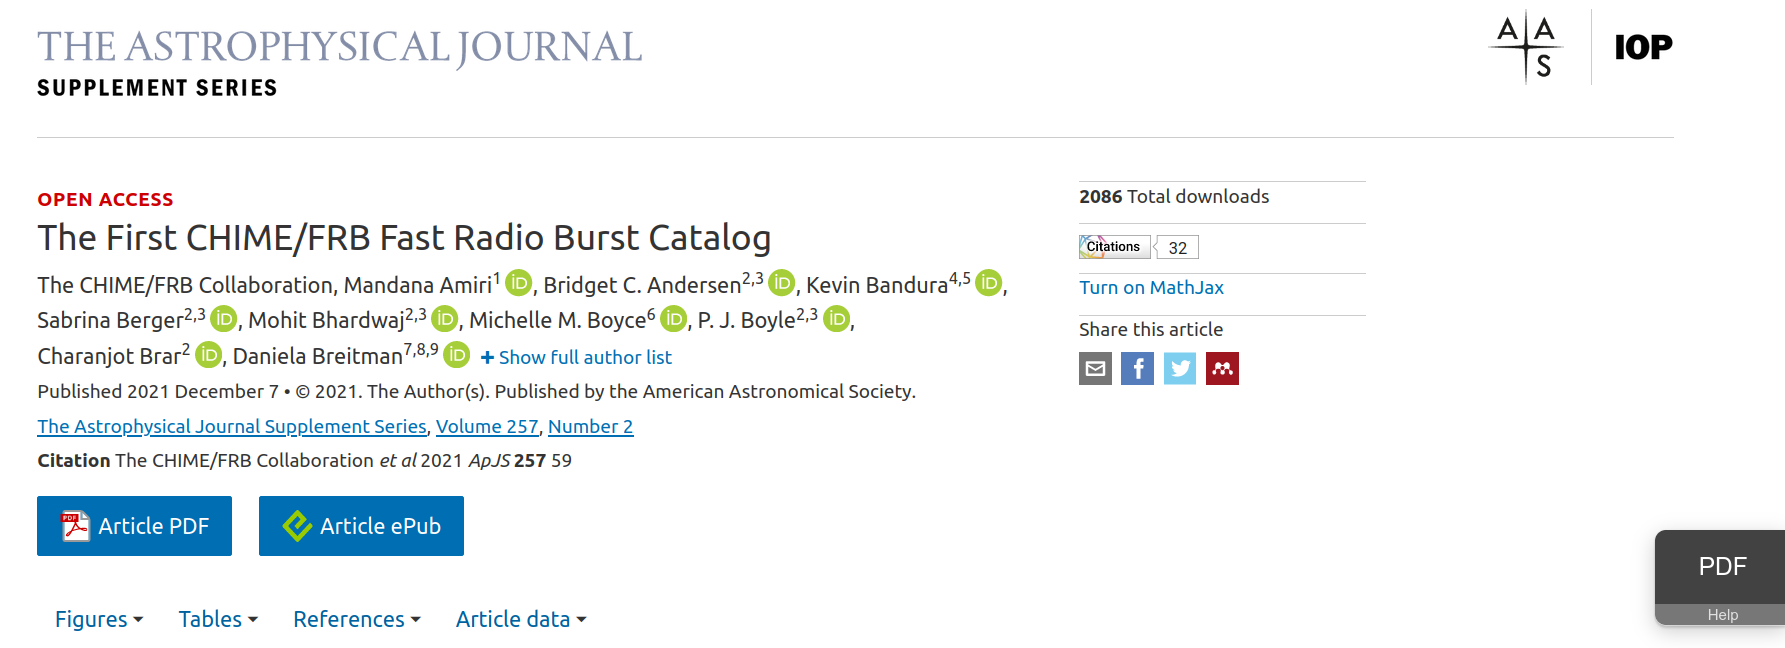

## Colored Noises

I will generate colored noises only until the end of the work. I know the whole program works for these kind of series and the FRB ones are still new.

In [1]:
!pip install colorednoise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
import io
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import colorednoise as cn
from matplotlib.pyplot import figure
#%matplotlib inline

#Cloning Computational Statistics Repository
!git clone 'https://github.com/barauna-lo/Computational_Statistics.git' 



Cloning into 'Computational_Statistics'...
remote: Enumerating objects: 329, done.
remote: Counting objects: 100% (169/169), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 329 (delta 101), reused 142 (delta 86), pack-reused 160
Receiving objects: 100% (329/329), 26.57 MiB | 22.73 MiB/s, done.
Resolving deltas: 100% (156/156), done.


In [3]:
%cd Computational_Statistics/ 

/content/Computational_Statistics


In [4]:
#Alternativa 
# GERANDO SÉRIES TEMPORAIS DE RUÍDOS COLORIDOS
colorData = pd.DataFrame()
#SetUp a noise class
#beta,dataSize = [0.2,1,2],len_size 
beta,dataSize = [0,1,2],2**10
#Creat dataSize
for i in range(len(beta)): colorData.insert(i,'beta'+str(i),cn.powerlaw_psd_gaussian(beta[i],dataSize))#,random_state=8666)) #insert new collums
df = colorData

## Ploting all Data Series
Lets take a look on the data

## Times Series FROM FRB

In [5]:
#download data
!gdown "https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/files/vault/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data/FRB20180725A_waterfall.h5"

import h5py
file_name = "FRB20180725A_waterfall.h5"
data = h5py.File(file_name, "r")

import numpy as np
data = data["frb"]
cal_wfall =  data["calibrated_wfall"][:]
cal_ts = np.nanmean(cal_wfall, axis = 0)
df = pd.DataFrame()
df.insert(0,'cal_ts',cal_ts)

figure(figsize=(20,5),dpi=80)
plt.subplot(1,2,1) 
plt.plot(df)
plt.title('Original FRB Data')
plt.subplot(1,2,2)
df = df[32:-32] #Resizing the Time series for a 2**7 
plt.plot(df)
plt.title('Resized FRB Data')
plt.show()

OSError: ignored


$$ \gamma_1 = \frac{2}{7} (\bar{\alpha}-\beta) $$


In [ ]:
#import function
import SpecplusV02 as specplus 
import MFDFA as mfdfa 
# 
% cd .. #Get out of the folders

In [ ]:
#columns = df.columns #Extracting colluns names
columns = ['cal_ts']
gamma1 = []
for i in range(len(columns)): 
    gamma1.append(specplus.gamma1(df[columns[i]])[2])
    print("γ1 de "+columns[i]+" = ",round(specplus.gamma1(df[columns[i]])[2],5))

# Multifractal Singularity Spectra (MFSS) 

via MFDFA.py (Módulos A, B, C, D e E)



# Task 02: 
Calcular $\gamma_2$



---



In [ ]:
import MFDFA as mfdfa

gamma2,dalpha = [],[]
for i in range(len(columns)): 
    gamma2.append(mfdfa.gamma2(df[columns[i]])[0])
    dalpha.append(mfdfa.gamma2(df[columns[i]])[1])
    print(columns[i]+' - Δα %g, γ2 %g' % (mfdfa.gamma2(df[columns[i]])[1] ,mfdfa.gamma2(df[columns[i]])[0]))
    #print("γ1 de "+columns[i]+" = ",round(specplus.gamma1(df[columns[i]])[2],5))


# Task 03:

Janelamento + plotagem gamma 1 x gamma 2.



---



## Janelamento

Para realizarmos o _"Janelamento"_ iremos dividir nossa série temporal 4 partes. Então calcularemos os valores de $\gamma_1$ e $\gamma_2$ para cada janeja daquela série temporal

In [ ]:
# PRECISA SER AUTOMATIZADO
window = int(len(df)/4)
# splitting dataframe by row index
df_1 = df.iloc[:window,:]
df_2 = df.iloc[window:2*window,:]
df_3 = df.iloc[2*window:3*window,:]
df_4 = df.iloc[3*window:,:]
print("Shape of new dataframes - {} , {}".format(df_1.shape, df_2.shape))

#Alocating new gamma1 and gamma2
gamma1_win1,gamma1_win2,gamma1_win3,gamma1_win4= [],[],[],[]
gamma2_win1,gamma2_win2,gamma2_win3,gamma2_win4 = [] , [] , [] , []
dalpha_win1,dalpha_win2,dalpha_win3,dalpha_win4 = [] , [] , [] , []
for i in range(len(columns)): 
    gamma1_win1.append(specplus.gamma1(df_1[columns[i]])[2])
    gamma1_win2.append(specplus.gamma1(df_2[columns[i]])[2])
    gamma1_win3.append(specplus.gamma1(df_3[columns[i]])[2])
    gamma1_win4.append(specplus.gamma1(df_4[columns[i]])[2])
    
    gamma2_win1.append(mfdfa.gamma2(df_1[columns[i]])[0])
    gamma2_win2.append(mfdfa.gamma2(df_2[columns[i]])[0])
    gamma2_win3.append(mfdfa.gamma2(df_3[columns[i]])[0])
    gamma2_win4.append(mfdfa.gamma2(df_4[columns[i]])[0])



In [ ]:
char_lines = len(columns)
char_colum = 3
figure(figsize=(20,6*char_lines),dpi=80)

#i=0
for i in range(char_lines):
    plt.subplot(char_lines,char_colum,((3*i+1,3*i+2)))
    plt.plot(df[columns[i]],color=cor[i])
    plt.axvline(x=window,color='red',linestyle='--')
    plt.axvline(x=2*window,color='red',linestyle='--')
    plt.axvline(x=3*window,color='red',linestyle='--')
    plt.axvline(x=4*window,color='red',linestyle='--')
    plt.title(columns[i])

    plt.subplot(char_lines,char_colum,(3*(i+1)))
    plt.scatter(gamma2_win1[i],gamma1_win1[i],label='Janela 1')
    plt.scatter(gamma2_win2[i],gamma1_win2[i],label='Janela 2')
    plt.scatter(gamma2_win3[i],gamma1_win3[i],label='Janela 3')
    plt.scatter(gamma2_win4[i],gamma1_win4[i],label='Janela 4')
    plt.title(columns[i])
    plt.grid()
    plt.legend()
    plt.xlabel(r'$\gamma_2$')
    plt.ylabel(r'$\gamma_1$')
    plt.title(r'$\gamma_2 \times \gamma_1$',size=15)
    #plt.xlim(-0.2,1.1)
    #plt.ylim(-0.2,1.1)

#plt.suptitle(r'$\gamma_2 \times \gamma_1$ for each time series window',size=30)  
plt.show()





---



# Task Extra 
Complet Data Analyse for all tools allready used

In [ ]:

i=0
dx = df[columns[i]]
#specplus.main(dx,columns[i])

[timeMeasure, meanDataMeasure, scales] = mfdfa.getHurstByUpscaling(dx)                    # Set of parameters No. 1
#[timeMeasure, meanDataMeasure, scales] = getHurstByUpscaling(dx, 3.0, 0, 2.0)       # Set of parameters No. 2
[bScale, bDM, bsIndex, HMajor, HMinor] = mfdfa.getScalingExponents(timeMeasure, meanDataMeasure)
# Modified first-order MF-DFA
[_, dataMeasure, _, stats, q] = mfdfa.getMSSByUpscaling(dx, isNormalised = 1)


# Modified first-order DFA
[timeMeasure, meanDataMeasure, scales] = mfdfa.getHurstByUpscaling(dx)                    # Set of parameters No. 1
#[timeMeasure, meanDataMeasure, scales] = getHurstByUpscaling(dx, 3.0, 0, 2.0)       # Set of parameters No. 2

[bScale, bDM, bsIndex, HMajor, HMinor] = mfdfa.getScalingExponents(timeMeasure, meanDataMeasure)


# Output
# Modified first-order DFA
figure(figsize=(25,15),dpi=80)
plt.subplot(3, 2, 1)
plt.loglog(timeMeasure, meanDataMeasure, 'ko-')
plt.xlabel(r'$\mu(t)$')
plt.ylabel(r'$\mu(\Delta x)$')
plt.grid('on', which = 'minor')
plt.title('Modified First-Order DFA of a Multifractal Noise')

plt.subplot(3, 2, 2)
plt.loglog(scales, meanDataMeasure, 'ko-')
plt.loglog(bScale, bDM, 'ro')
plt.xlabel(r'$j$')
plt.ylabel(r'$\mu(\Delta x)$')
plt.grid('on', which = 'minor')

# Modified first-order MF-DFA

plt.subplot(3, 2, 3)
nq = np.int(len(q))
leg_txt = []
for qi in range(1, nq + 1):
    llh = plt.loglog(scales, dataMeasure[qi - 1, :], 'o-')
    leg_txt.append('tau = %g (q = %g)' % (stats['tau'][qi - 1], q[qi - 1]))
plt.xlabel(r'$j$')
plt.ylabel(r'$\mu(\Delta x, q)$')
plt.grid('on', which = 'minor')
plt.title('Modified First-Order MF-DFA of a Multifractal Noise')
#plt.legend(leg_txt)


plt.subplot(3, 2, 4)
plt.plot(q, stats['tau'], 'ko-')
plt.xlabel(r'$q$')
plt.ylabel(r'$\tau(q)$')
plt.grid('on', which = 'major')
plt.title('Statistics of Modified First-Order MF-DFA of a Multifractal Noise')


plt.subplot(3, 2, 5)
plt.plot(stats['LH'], stats['f'], 'ko-')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$f(\alpha)$')
# plt.grid('on', which = 'major')

plt.subplot(3, 2, 6)
sns.distplot(dx, bins=40, hist_kws={'edgecolor':'black'})
plt.ylabel('Frequency of A per bin')
plt.xlabel('Blue Bins')
plt.title('Kenal Density Function for '+columns[i])
#specplus.cullenfreyGEV(dx)


plt.show()

#PRINTING SPECTRUM PARAMETERS
print('alpha_min = %g, alpha_max = %g, dalpha = %g' % (stats['LH_min'], stats['LH_max'], stats['LH_max'] - stats['LH_min']))
print('h_min = %g, h_max = %g, dh = %g\n' % (stats['h_min'], stats['h_max'], stats['h_max'] - stats['h_min']))




In [ ]:
i=0
dx = df[columns[i]]
specplus.main(dx,columns[i])



---

